In [1]:
import recon
import plotting as plot
import numpy as np
import pandas as pd
import seaborn as sns
import utilities
import warnings
warnings.filterwarnings('ignore')

model = recon.Recon()
util = utilities.Utilities()

### Metabolomics data

In [2]:
met_slc25a51ko = pd.read_csv('../data/metabolomics_slc25a51ko_vs_parental.csv', 
                             sep='\t', index_col=0)
met_uc = pd.read_csv('../data/metabolomics_uc_vs_healthy.csv', sep=',')

### Proteomics data (UC vs Healthy)

In [3]:
prot_uc = pd.read_csv('../data/prot_uc_vs_healthy.csv', sep='\t', index_col=0)
prot_uc = util.map_gene(prot_uc, g_mapping=model.genes, mapping_column='symbol')

### Predicted change

In [15]:
res_slc25a51ko = pd.read_csv('../data/pr_slc25a51ko_wt.csv', sep='\t', index_col=0)
res_uc = pd.read_csv('../data/pr_prot_uc_vs_healthy.csv', sep='\t', index_col=0)

# Histograms

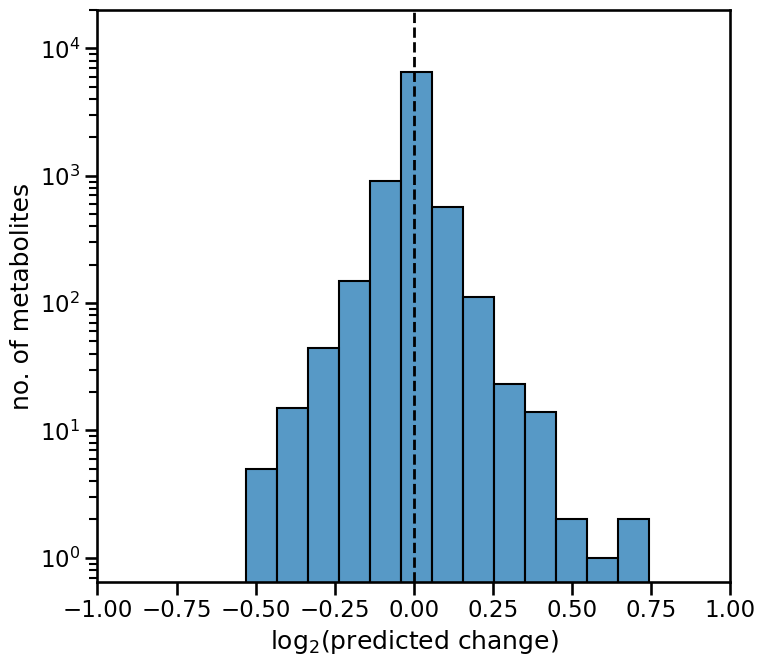

In [16]:
# Figure 2a
sns.set_context('talk', font_scale=1.0)
plot.hist(pr=np.log2(res_slc25a51ko.mean(axis=1)), bins=13, figsize=(8, 7), xlim=(-1.0, 1.0),
          ylim=(0, 2e4), xlabel='log$_2$(predicted change)', ylabel='no. of metabolites',
          save=True, filename='../../biomarker_predictions/manuscript/submission/images/Figure_2a.svg')

In [10]:
def prep_data(mets, res):
    df = pd.concat((mets.mean(axis=1), res.mean(axis=1),
                    mets.std(axis=1), res.std(axis=1)), axis=1).dropna()
    df.columns = ['Measured', 'Predicted', 'Measured std_dev',
                  'Predicted std_dev']
    return df


def rename_index(df):
    df = df.rename(index={'Adenosine monophosphate': 'AMP',
                          'Adenosine triphosphate': 'ATP',
                          'Cyclic AMP': 'cAMP',
                          '2,3-Diphosphoglyceric acid': '2,3-DPG',
                          '6-Phosphogluconic acid': '6PG',
                          'D-Sedoheptulose 7-phosphate': 'S7P',
                          'Fructose 1,6-bisphosphate': 'F16BP',
                          'Fructose 6-phosphate': 'F6P',
                          'Glucose 1-phosphate': 'G1P',
                          'Glucose 6-phosphate': 'G6P',
                          'Phosphoenolpyruvic acid': 'PEP',
                          'S-Adenosylmethionine': 'SAM',
                          'N-Acetyl-L-aspartic acid': 'NAA',
                          'Hydroxykynurenine': '3OHKYN'})
    return df

### RNA-Seq data

In [11]:
rna_slc25a51ko = pd.read_csv('../data/rnaseq_slc25a51ko_vs_parental.csv', sep='\t', index_col=0)
rna_slc25a51ko = util.map_gene(df=rna_slc25a51ko, g_mapping=model.genes, mapping_column='ensembl_gene')

In [12]:
res_HEK = util.reshape(res_slc25a51ko, include=None)
_res = res_HEK[res_HEK.compartment.isin(['mitochondrial', 'nuclear', 'cytoplasm'])].groupby(
    'metabolites').mean(numeric_only=True)
df_mean = prep_data(mets=met_slc25a51ko, res=_res)

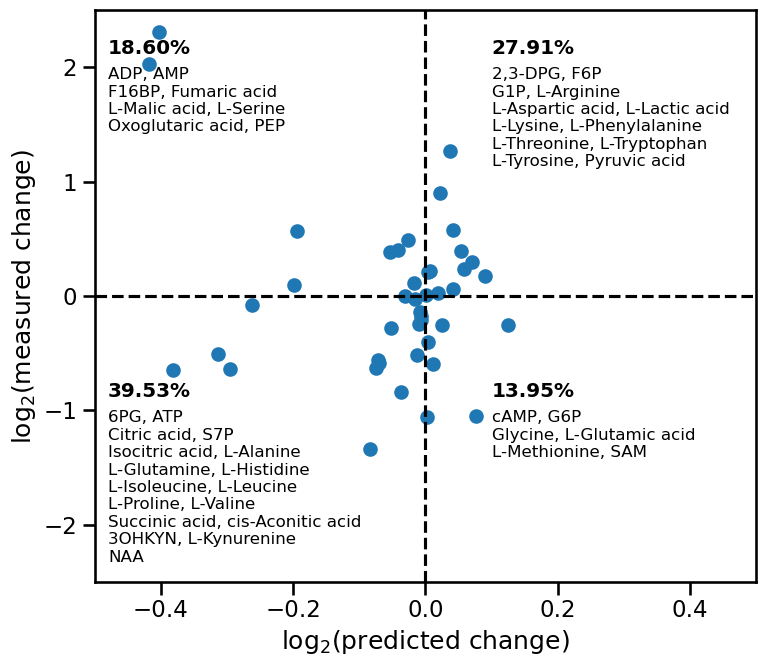

In [14]:
# Figure 2b
sns.set_context('talk', font_scale=1.0)

# _df = df_mean[df_mean.index.isin(mets_pvalue.fullName)]
_df = rename_index(df_mean[~df_mean.index.isin(['D-Glucose', 'Nicotinic acid'])])
plot.parity(data=_df, xcolumn='Measured', ycolumn='Predicted',
            show_percentage=True, show_names=True, alpha=1.0, 
            figsize=(8, 7), edgecolor=None,
            ylabel='log$_2$(measured change)', xlabel='log$_2$(predicted change)',
            n=[2, 2, 2, 2], fsize=12, xlim=(-0.5, 0.5), ylim=(-2.5, 2.5),
            l_p=[(0.02, 0.95), (0.6, 0.95), (0.02, 0.35), (0.6, 0.35)],
            l_n=[(0.02, 0.90), (0.6, 0.90), (0.02, 0.30), (0.6, 0.30)],
            save=True, filename='../../biomarker_predictions/manuscript/submission/images/Figure_2b.svg')

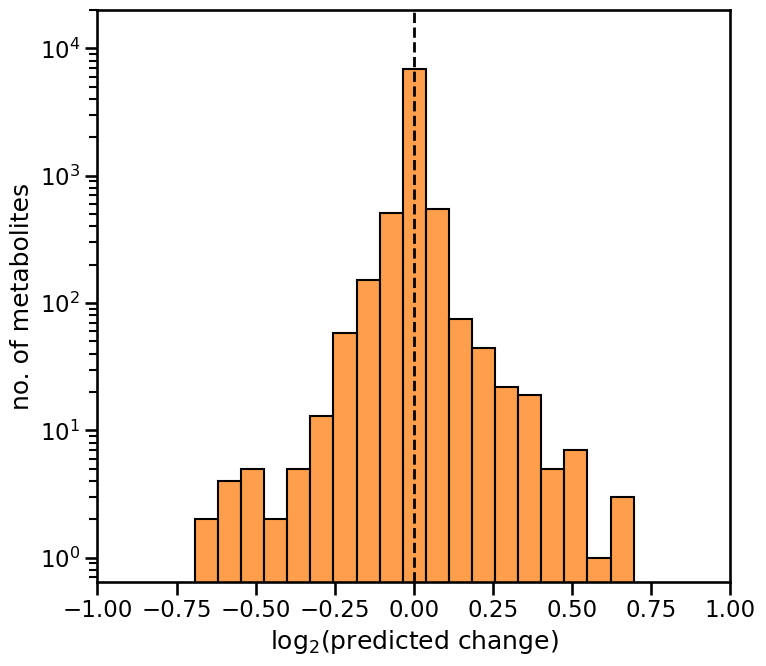

In [18]:
# Figure 3a
sns.set_context('talk', font_scale=1.0)
plot.hist(pr=np.log2(res_uc.mean(axis=1)),
          figsize=(8,7), xlim=(-1., 1.), bins=19, color='C1', ylim=(0, 2e4),
          xlabel='log$_2$(predicted change)', ylabel='no. of metabolites',
          save=True, filename='../../biomarker_predictions/manuscript/submission/images/Figure_3a.svg')

In [19]:
# Figure 3b
df = util.reshape(res_uc).groupby('metabolites').mean(numeric_only=True).reset_index()
df = met_uc.merge(df, right_on='metabolites', left_on='vmh', how='inner')
df = df.set_index('metabolites').drop('vmh', axis=1)
df.columns = ['p', 'padj', 'Measured', 'Predicted']
df['hue'] = 'C1'
df.loc[(df.p > 0.05), 'hue'] = 'grey'
df.loc[(df.Predicted < 1.01) & (df.Predicted > 0.99), 'hue'] = 'grey'

In [20]:
def rename_index(df):
    df = df.rename(index={'3-Hydroxyhexadecanoylcarnitine': '3OH-C16-C',
                          '3-Hydroxy-Isovaleryl Carnitine': '3OH-IV-C',
                          '3-Hydroxy-11Z-octadecenoylcarnitine': '3OH-11Z-C18-C',
                          '3-Hydroxydodecanoylcarnitine': '3OH-C12-C',
                          '3-Hydroxy-Tetradecanoyl Carnitine': '3OH-C14-C', 
                          'Decanoylcarnitine': 'C10-C', 
                          'L-Octanoylcarnitine': 'C8-C',
                          '(3S)-3-Hydroxylinoleoyl-CoA': '3OH-LC18-C',  
                          'Isovaleryl Carnitine': 'IV-C', 
                          'N-Acetyl-L-aspartic acid': 'NAA',
                          'Alpha-linolenyl carnitine': 'A-LC18-C',
                          'Butyrylcarnitine': 'C4-C',
                          'Tiglyl Carnitine': 'Tiglyl-C',
                          'Glutaryl Carnitine': 'Glutaryl-C',
                          'Hexanoyl Carnitine': 'C6-C',
                          'Glycerol 3-phosphate': 'G3P',})
    return df

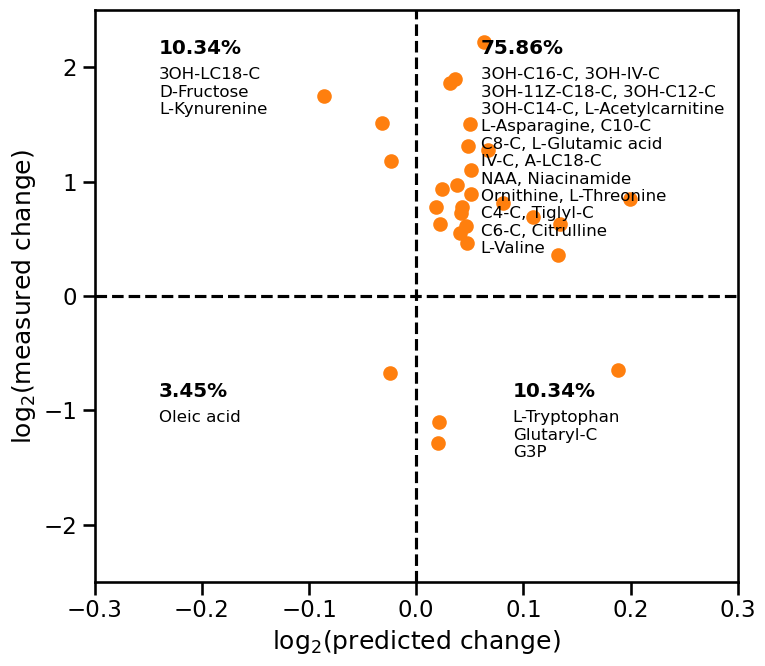

In [22]:
sns.set_context('talk', font_scale=1.0)
plot.parity(data=rename_index(df.loc[df.hue == 'C1']), xcolumn='Measured', ycolumn='Predicted',
            show_percentage=True, show_names=True, alpha=1.0,
            xlim=(-0.3, 0.3), ylim=(-2.5, 2.5), edgecolor=None,
            ylabel='log$_2$(measured change)', xlabel='log$_2$(predicted change)',
            n=[1, 2, 2, 1], figsize=(8, 7), color='C1',
            l_p=[(0.1, 0.95), (0.6, 0.95), (0.1, 0.35), (0.65, 0.35)],
            l_n=[(0.1, 0.90), (0.6, 0.90), (0.1, 0.30), (0.65, 0.30)],
            fsize=12, save=True, filename='../../biomarker_predictions/manuscript/submission/images/Figure_3b.svg')

## Figure 4

In [46]:
rna = pd.read_csv('../data/rnaseq_HEK293_complete.csv', sep='\t', index_col=0)
# rna = rna[~(rna == 0).any(axis=1)]
rna = util.map_gene(df=rna, g_mapping=model.genes,
                    mapping_column='ensembl_gene')
rna = rna[rna.index.isin(rna_slc25a51ko.index)]
rna = pd.concat((rna.filter(like='wtHEK293').mean(
    axis=1), rna.filter(like='SLC25A51ko').mean(axis=1)), axis=1)
rna.columns = ['wt', 'ko']
rdict = (rna['ko']-(rna['wt'])).div(rna['wt'], axis=0)
rdict = rdict.replace(np.inf, np.nan).dropna()

In [71]:
gs = model.gs

gnames = model.genes.set_index('gene_number').to_dict()['symbol']
gnames = {str(k): v for k,v in gnames.items()}

In [52]:
gs[rna_slc25a51ko.index].rename(columns=gnames).to_csv('../Supplementary_Table_S3.csv', sep='\t')

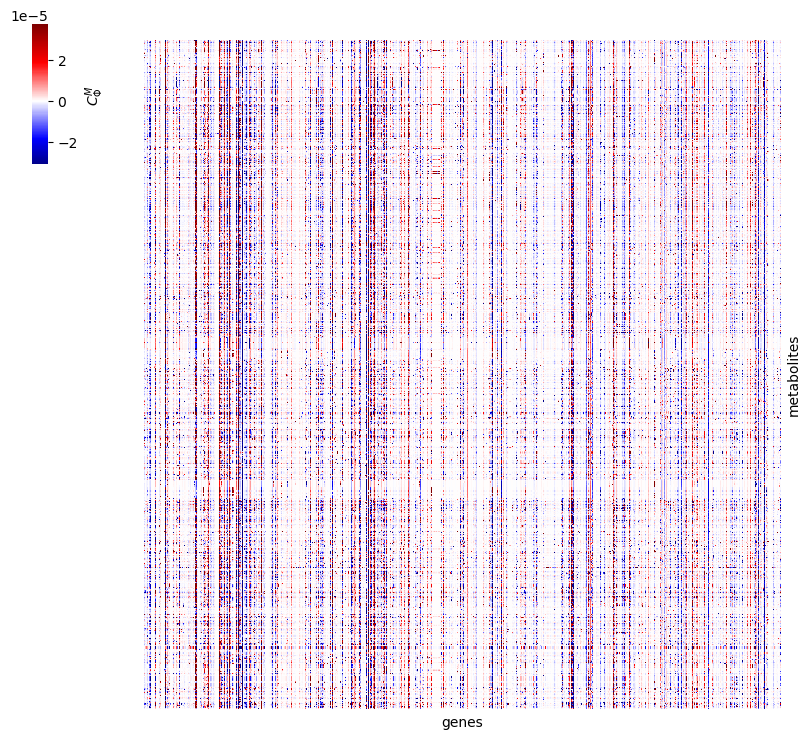

In [5]:
# Fugure 4b
_gs = util.reshape(gs.T.mul(rdict, axis=0).dropna().T, include=None)
cm = plot.control_coeff(df=_gs.groupby('metabolites').mean(numeric_only=True),
                        figsize=(8, 7))

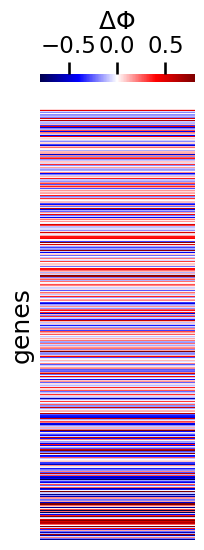

In [62]:
# Figure 4c
sns.set_context('talk', font_scale=1.0)

fig, ax = plot.differential_exp(df=pd.DataFrame(rdict), ylabel='genes', figsize=(2, 7))

In [63]:
def rename_index(df):
    df = df.rename(index={'Adenosine monophosphate': 'AMP',
                        'Adenosine triphosphate': 'ATP', 
                        'Cyclic AMP': 'cAMP'})
    return df

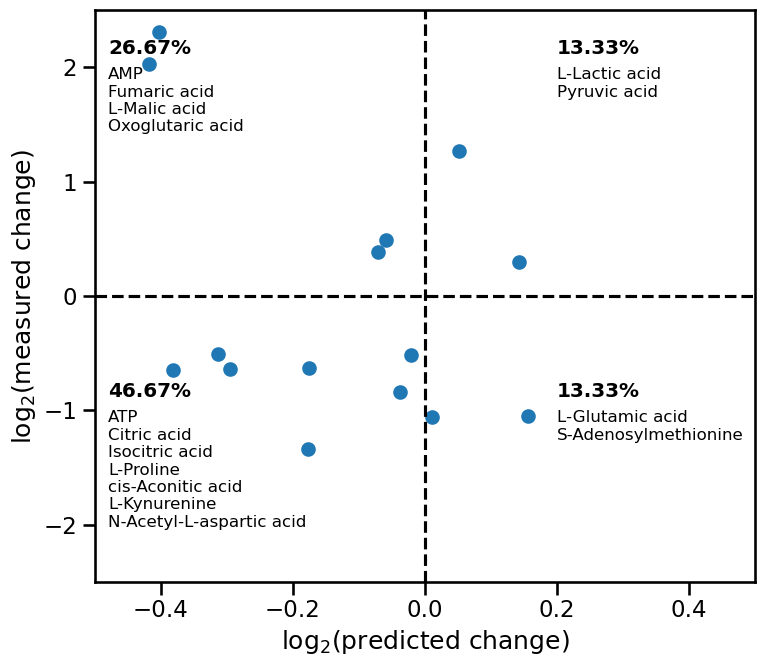

In [103]:
# Figure 4d
sns.set_context('talk', font_scale=1.0)
res_HEK = util.get_consistent_mets(res_slc25a51ko)
res_HEK = util.reshape(res_HEK, include=None)

_res = res_HEK[res_HEK.compartment.isin(['mitochondrial', 'nuclear', 'cytoplasm'])].groupby(
    'metabolites').mean(numeric_only=True)
df_mean = prep_data(mets=met_slc25a51ko, res=_res)
df = pd.read_csv('../Supplementary_Table_S1.csv', sep='\t', index_col=0)

_df = df_mean[df_mean.index.isin(df[df.pvalue < 0.05].index)]
_df = rename_index(_df[~_df.index.isin(['D-Glucose', 'Nicotinic acid'])])
plot.parity(data=_df, xcolumn='Measured', ycolumn='Predicted',
            show_percentage=True, show_names=True, alpha=1.0,
            figsize=(8, 7), edgecolor=None,
            ylabel='log$_2$(measured change)', xlabel='log$_2$(predicted change)',
            n=[1, 1, 1, 1], fsize=12, xlim=(-0.5, 0.5), ylim=(-2.5, 2.5),
            l_p=[(0.02, 0.95), (0.7, 0.95), (0.02, 0.35), (0.7, 0.35)],
            l_n=[(0.02, 0.90), (0.7, 0.90), (0.02, 0.30), (0.7, 0.30)])

Text(1590.2916666666665, 0.5, '')

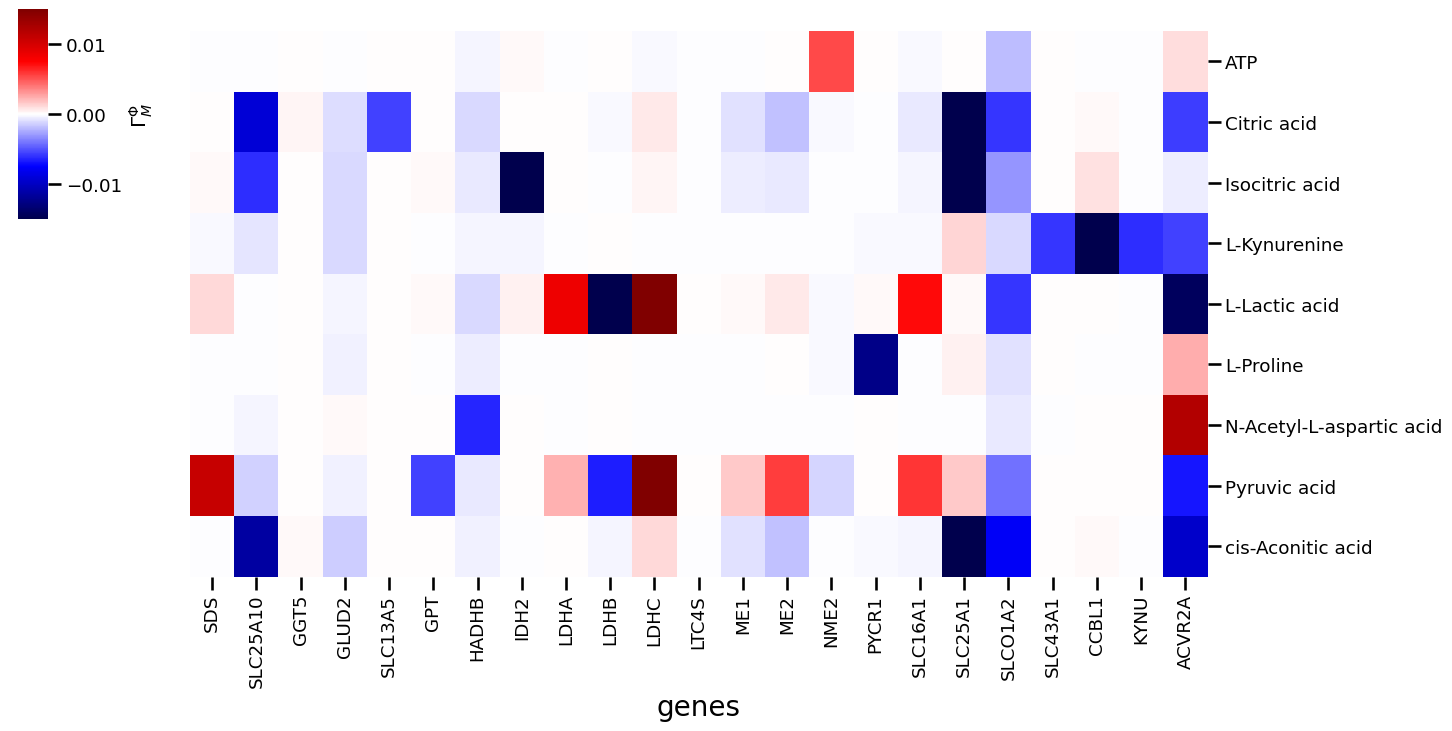

In [117]:
# Figure 4e
## get consitently predicted metabolites
res_HEK = util.get_consistent_mets(res_slc25a51ko)
res_HEK = util.reshape(res_HEK, include=None)
_res = res_HEK[res_HEK.compartment.isin(['mitochondrial', 'nuclear', 'cytoplasm'])].groupby(
    'metabolites').mean(numeric_only=True)
df_mean = prep_data(mets=met_slc25a51ko, res=_res)


df = pd.read_csv('../Supplementary_Table_S1.csv', sep='\t', index_col=0)
_df = df_mean[df_mean.index.isin(df[df.pvalue < 0.05].index)]
_df = rename_index(_df[~_df.index.isin(['D-Glucose', 'Nicotinic acid'])])
_df = _df.rename(index={'ATP': 'Adenosine triphosphate'})

_gs = util.reshape(gs.T.mul(rdict, axis=0).dropna().T, include=None)
gs_met = _gs[_gs.metabolites.isin(_df.index)]
gs_met = gs_met[gs_met.compartment != 'extracellular'].groupby('metabolites').mean(numeric_only=True)
gs_met = gs_met.rename(columns=gnames)

consistent = rename_index(util.get_consistent_mets(_df[['Measured', 'Predicted']])).index.to_list()
_gs_met = rename_index(gs_met.T[(gs_met.T.abs() > 0.005).any(axis=1)].T)

sns.set_context('talk', font_scale=0.8)
cm = plot.response_coeff(df=_gs_met[_gs_met.index.isin(consistent)], figsize=(15, 7))
cm.ax_heatmap.set_ylabel('')

In [119]:
_gs_met[_gs_met.index.isin(consistent)].to_csv('../Supplementary_Table_S4.csv', sep='\t')